In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import permutations
import multiprocessing
import time

In [2]:
def greedy(m, jobs: list[(str, int)]):
    J = [[] for i in range(m)]
    L = [0] * m
    for j, (name, t) in enumerate(jobs):
        i = np.argmin(L)
        J[i].append((name, t))
        L[i] = L[i] + t
    return J
    
def greedy_2(m, jobs: list[int]):
    J = [[] for i in range(m)]
    L = np.zeros(m)
    for j, t in enumerate(jobs):
        i = np.argmin(L)
        J[i].append(t)
        L[i] = L[i] + t
    return J



def sorted_greedy(m, jobs: list[(str, int)]):
    jobs.sort(key=lambda item: item[1], reverse=True)
    print(jobs)
    J = [[] for i in range(m)]
    L = [0] * m
    for j, (name, t) in enumerate(jobs):
        i = np.argmin(L)
        J[i].append((name, t))
        L[i] = L[i] + t
    return J

def gen_jobs(arr):
    jobs = []
    for i in range(len(arr)):
        jobs.append((f"J{i+1}", arr[i]))
    return jobs

jobs = gen_jobs([4, 2, 5, 6, 3, 7])
print(greedy_2(2, [4, 2, 5, 6, 3, 7]))
print(greedy(2, jobs))
print(sorted_greedy(2, jobs))

[[4, 6, 7], [2, 5, 3]]
[[('J1', 4), ('J4', 6), ('J6', 7)], [('J2', 2), ('J3', 5), ('J5', 3)]]
[('J6', 7), ('J4', 6), ('J3', 5), ('J1', 4), ('J5', 3), ('J2', 2)]
[[('J6', 7), ('J1', 4), ('J5', 3)], [('J4', 6), ('J3', 5), ('J2', 2)]]


In [3]:
%%time

# def evaluate_markspan(m, jobs: list[(str, int)]):
#     jobs = [j[1] for j in jobs]
#     Ts = []
#     for order in permutations(jobs):
#         results = greedy_2(m, order)
#         temp = list(map(np.sum, results))
#         Ts.append(np.max(temp))
#     return sum(Ts) / len(Ts), min(Ts)

def greedy_2(m, jobs: list[int]):
    J = [[] for i in range(m)]
    L = [0] * m
    for j, t in enumerate(jobs):
        i = np.argmin(L)
        J[i].append(t)
        L[i] = L[i] + t
    return J

def evaluate_markspan(m, jobs: list[(str, int)]):
    jobs = [j[1] for j in jobs]
    Ts = []
    for order in permutations(jobs):
        temp = 0 
        for assigned in greedy_2(m, order):
            temp = max(temp, sum(assigned))
        Ts.append(temp)
    return sum(Ts) / len(Ts), min(Ts)
# jobs = [('J1', 1), ('J2', 1), ('J3', 2), ('J4', 2), ('J5', 3), ('J6', 3), ('J7', 4), ('J8', 4), ('J9', 5), ('J10', 5)]
jobs = [('J1', 1), ('J2', 1), ('J3', 2), ('J4', 2), ('J5', 3), ('J6', 3), ('J7', 4), ('J8', 4)]

# 记录程序开始运行的时间
start = time.perf_counter()

averageT, minT = evaluate_markspan(int(len(jobs)/2)+1, jobs)
print(averageT, minT, averageT/minT)

# 记录程序结束运行的时间
end = time.perf_counter()

# 计算程序运行时间
elapsed = end - start
print(f"程序运行时间为{elapsed}秒")

5.428571428571429 4 1.3571428571428572
程序运行时间为0.9762140249999902秒
CPU times: user 979 ms, sys: 8.21 ms, total: 987 ms
Wall time: 976 ms


In [4]:

machine_num = 0
def worker(order):
    temp = 0 
    for assigned in greedy_2(machine_num, order):
        temp = max(temp, sum(assigned))
    return temp
        
def evaluate_markspan_2(m, jobs: list[(str, int)]):
    global machine_num
    machine_num = m
    jobs = [j[1] for j in jobs]
    Ts = []
    pool = multiprocessing.Pool(processes=16) 
   
    Ts = pool.map(worker, permutations(jobs))
    # pool.close()
    # pool.join()

    return sum(Ts) / len(Ts), min(Ts)

jobs = [('J1', 1), ('J2', 1), ('J3', 2), ('J4', 2), ('J5', 3), ('J6', 3), ('J7', 4), ('J8', 4)]


# 记录程序开始运行的时间
start = time.perf_counter()

averageT, minT = evaluate_markspan_2(int(len(jobs)/2)+1, jobs)
print(averageT, minT, averageT/minT)

# 记录程序结束运行的时间
end = time.perf_counter()

# 计算程序运行时间
elapsed = end - start
print(f"程序运行时间为{elapsed}毫秒")

5.428571428571429 4 1.3571428571428572
程序运行时间为0.2117369430002327毫秒


In [5]:
jobs = gen_jobs([1, 1, 2])

# 记录程序开始运行的时间
start = time.perf_counter()

averageT, minT = evaluate_markspan(2, jobs)
print(averageT, minT, averageT/minT)

# 记录程序结束运行的时间
end = time.perf_counter()

# 计算程序运行时间
elapsed = end - start
print(f"程序运行时间为{elapsed}秒")


2.3333333333333335 2 1.1666666666666667
程序运行时间为0.0004525969998212531秒


[('J3', 2), ('J1', 1), ('J2', 1)]


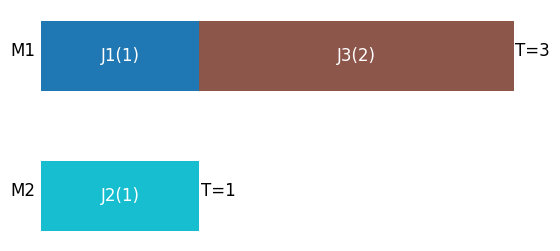

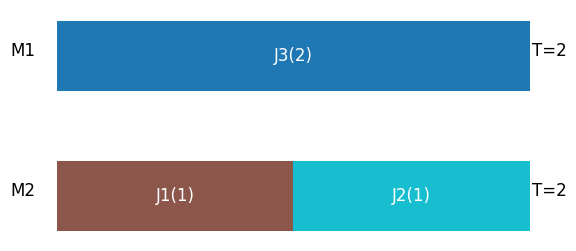

In [6]:
def flatten(lists):
    flat_list = []
    for row in lists:
        flat_list.extend(row)
    return flat_list

def format_title(machine_num, jobs):
    jobs = [f"{job[1]}" for job in jobs]
    return f"m={machine_num}, jobs=[{', '.join(jobs)}]"

def format_job(job):
    # return f"{job[0]}"
    return f"{job[0]}({job[1]})"



def draw_assigned(assigned: list(list((str, int))), jobs):
    machine_num = len(assigned)
    machines = [f"M{i+1}" for i in range(machine_num)]
    t = [[job[1] for job in assigned_jobs] for assigned_jobs in assigned]
    t = flatten(t)
    colors = mpl.colormaps["tab10"](np.linspace(0, 1, len(t)))
 
    fig, ax = plt.subplots(figsize=(6.4, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.set_axis_off()
    # ax.set_title(format_title(machine_num, jobs))
    for i, assigned_jobs in enumerate(assigned):
        labels = list(map(format_job, assigned_jobs))
        widths = [job[1] for job in assigned_jobs]
        starts = [sum(widths[:i]) for i in range(len(assigned_jobs))]
        # rects = ax.barh([machines[i]] * len(labels), widths, left=starts, height=0.5, label=labels, color=colors[:len(labels)])
        rects = ax.barh([i] * len(labels), widths, left=starts, height=0.5, label=labels, color=colors[:len(labels)])
        ax.text(-0.2, i, machines[i],  size=12,)
        T = sum(widths)
        ax.text(T + 0.01, i, f"T={T}",  size=12)
        colors = colors[len(labels):]
        
        text_color = 'white'
        
        ax.bar_label(rects, labels=labels, size=12, label_type='center', color=text_color)
    return fig, ax

jobs = gen_jobs([1, 1, 2])
draw_assigned(greedy(2, jobs), jobs)
draw_assigned(sorted_greedy(2, jobs), jobs)
plt.show()

# Exercise 1

In [7]:
def gen_repeat_jobs(num):
    jobs = []
    for i in range(num):
        jobs.append((f"J{len(jobs)+1}", i+1))
        jobs.append((f"J{len(jobs)+1}", i+1))
    return jobs
    

## Example 1

[('J1', 1), ('J2', 1), ('J3', 2), ('J4', 2), ('J5', 3), ('J6', 3), ('J7', 4), ('J8', 4)]
(5.428571428571429, 4, 1.3571428571428572)


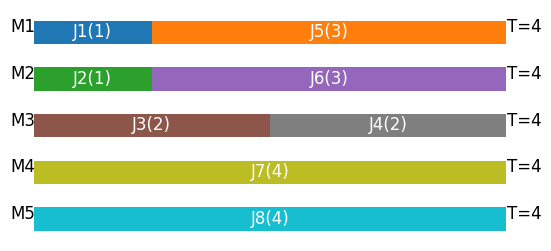

In [8]:
# %%time
num = 4
jobs = gen_repeat_jobs(num)
print(jobs)
best_assigned = [
    [('J1', 1), ('J5', 3), ],
    [('J2', 1), ('J6', 3), ],
    [('J3', 2), ('J4', 2), ],
    [('J7', 4)],
    [('J8', 4)],
]
draw_assigned(best_assigned, jobs)

averageT, minT = evaluate_markspan(num+1, jobs)
print(f"{averageT, minT, averageT/minT}")

## Example 2

In [9]:
# 记录程序开始运行的时间
start = time.perf_counter()


num = 6
jobs = gen_repeat_jobs(num)
# best_assigned = [
#     [('J1', 1), ('J5', 3), ],
#     [('J2', 1), ('J6', 3), ],
#     [('J3', 2), ('J4', 2), ],
#     [('J7', 4)],
#     [('J8', 4)],
# ]
# draw_assigned(best_assigned, jobs)

averageT, minT = evaluate_markspan(num+1, jobs)
print(averageT, minT, averageT/minT)

# 记录程序结束运行的时间
end = time.perf_counter()

# 计算程序运行时间
elapsed = end - start
print(f"程序运行时间为{elapsed}秒")

8.435185185185185 6 1.4058641975308641
程序运行时间为16446.764689654003秒


In [ ]:
# 记录程序开始运行的时间
start = time.perf_counter()


num = 10
jobs = gen_repeat_jobs(num)
# best_assigned = [
#     [('J1', 1), ('J5', 3), ],
#     [('J2', 1), ('J6', 3), ],
#     [('J3', 2), ('J4', 2), ],
#     [('J7', 4)],
#     [('J8', 4)],
# ]
# draw_assigned(best_assigned, jobs)

averageT, minT = evaluate_markspan(num+1, jobs)
print(averageT, minT, averageT/minT)

# 记录程序结束运行的时间
end = time.perf_counter()

# 计算程序运行时间
elapsed = end - start
print(f"程序运行时间为{elapsed}秒")

# Exercise 2

## Example 1

In [ ]:
%%time

jobs = [('J1', 1), ('J2', 1), ('J3', 1), ('J4', 1), ('J5', 4)]

draw_assigned(greedy(2, jobs), jobs)
draw_assigned(sorted_greedy(2, jobs), jobs)


averageT, minT = evaluate_markspan(2, jobs)
print(averageT, minT, averageT/minT)